In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [2]:
dataset = pd.read_csv('data/preprocessed_dataset.csv', sep=';')

In [3]:
dataset

,overall,reviewText,description,brand,feature,price,asin,preprocessedText,tagged_text
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,i read lot review spoken number current owner ...,"[('i', 'NOUN', 0.0), ('read', 'VERB', 0.0), ('..."
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,or maybe the good news le 200 100 signing new ...,"[('or', 'CONJ', 0.0), ('maybe', 'ADV', 0.0), (..."
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,having previously owned lg vx9800 one best pho...,"[('having', 'VERB', 0.0), ('previously', 'ADV'..."
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,35 star i excited launch motorola q since i co...,"[('35', 'NUM', 0.0), ('star', 'NOUN', 0.0), ('..."
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,i want warn it professional verizon wireless p...,"[('i', 'NOUN', 0.0), ('want', 'VERB', 1.0), ('..."
...,...,...,...,...,...,...,...,...,...
9661,1.0,No instructions. Makes me question if is real...,"['', ""The Samsung Galaxy S7 is more than a sma...",Samsung,"['Built-in, defense-grade mobile security with...",89.32,B01FIW1B9S,no instruction make question really new cellph...,"[('no', 'DET', -1.0), ('instruction', 'NOUN', ..."
9662,5.0,Finally using the phone. Works great and was ...,"['Check email, view texts, and browse the Web ...",Samsung,['DOES THIS DEVICE NEED A SIM CARD: Yes it doe...,114.99,B01GBYWMO0,finally using phone work great easy transfer a...,"[('finally', 'ADV', 0.0), ('using', 'VERB', 0...."
9663,4.0,does funny things rarely . like FB will just r...,['The energy XL is a stunning smartphone that ...,BLU,"['Super 5,000mAh Massive Battery. OTG capabili...",224.96,B01GWUXN5K,funny thing rarely like fb reboot phone o stab...,"[('funny', 'ADJ', 4.0), ('thing', 'NOUN', 0.0)..."
9664,1.0,This phone is no good!! Keeps freezing up. Eve...,['iPhone with iOS 9; Lightning to USB Cable; U...,Apple,['Renewed products look and work like new. The...,40.08,B01GXAT0BK,this phone good keep freezing even touching po...,"[('this', 'DET', 0.0), ('phone', 'NOUN', 0.0),..."


In [4]:
def calculate_review_sentiment_score(x):
    tot = 0
    card = 0
    for word, _, score in x:
        if score != 0:
            tot += score
            card += 1
    
    return tot/card if card != 0 else 0    

In [5]:
from ast import literal_eval
dataset['tagged_text'] = dataset['tagged_text'].apply(literal_eval)

In [6]:
dataset['RSS'] = dataset['tagged_text'].apply(calculate_review_sentiment_score)

I ratings sono da 1 a 5, mentre i sentiment scores da -5 a 5, quindi vengono normalizzati tra 1 e 5 

In [7]:
def normalize_RSS(x):
    norm = 0
    if x >= 3:
        norm = 5

    elif 1 < x <= 3:
        norm = 4

    elif -0.5 < x <= 1:
        norm = 3

    elif -3 < x <= -0.5:
        norm = 2

    elif x <= -3 :
        norm = 1

    return norm

In [8]:
dataset['RSS'] = dataset['RSS'].apply(normalize_RSS)

In [9]:
dataset

,overall,reviewText,description,brand,feature,price,asin,preprocessedText,tagged_text,RSS
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,i read lot review spoken number current owner ...,"[(i, NOUN, 0.0), (read, VERB, 0.0), (lot, NOUN...",4
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,or maybe the good news le 200 100 signing new ...,"[(or, CONJ, 0.0), (maybe, ADV, 0.0), (the, DET...",3
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,having previously owned lg vx9800 one best pho...,"[(having, VERB, 0.0), (previously, ADV, 0.0), ...",4
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,35 star i excited launch motorola q since i co...,"[(35, NUM, 0.0), (star, NOUN, 0.0), (i, NOUN, ...",3
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,i want warn it professional verizon wireless p...,"[(i, NOUN, 0.0), (want, VERB, 1.0), (warn, ADP...",3
...,...,...,...,...,...,...,...,...,...,...
9661,1.0,No instructions. Makes me question if is real...,"['', ""The Samsung Galaxy S7 is more than a sma...",Samsung,"['Built-in, defense-grade mobile security with...",89.32,B01FIW1B9S,no instruction make question really new cellph...,"[(no, DET, -1.0), (instruction, NOUN, 0.0), (m...",2
9662,5.0,Finally using the phone. Works great and was ...,"['Check email, view texts, and browse the Web ...",Samsung,['DOES THIS DEVICE NEED A SIM CARD: Yes it doe...,114.99,B01GBYWMO0,finally using phone work great easy transfer a...,"[(finally, ADV, 0.0), (using, VERB, 0.0), (pho...",4
9663,4.0,does funny things rarely . like FB will just r...,['The energy XL is a stunning smartphone that ...,BLU,"['Super 5,000mAh Massive Battery. OTG capabili...",224.96,B01GWUXN5K,funny thing rarely like fb reboot phone o stab...,"[(funny, ADJ, 4.0), (thing, NOUN, 0.0), (rarel...",4
9664,1.0,This phone is no good!! Keeps freezing up. Eve...,['iPhone with iOS 9; Lightning to USB Cable; U...,Apple,['Renewed products look and work like new. The...,40.08,B01GXAT0BK,this phone good keep freezing even touching po...,"[(this, DET, 0.0), (phone, NOUN, 0.0), (good, ...",5


In [10]:
dataset['RSS'].value_counts()

RSS
4    4322
3    2952
5    1429
2     849
1     114
Name: count, dtype: int64

In [11]:
dataset['tagged_text'][9664]

[('this', 'DET', 0.0),
 ('phone', 'NOUN', 0.0),
 ('good', 'ADJ', 3.0),
 ('keep', 'NOUN', 0.0),
 ('freezing', 'VERB', 0.0),
 ('even', 'ADV', 0.0),
 ('touching', 'VERB', 0.0),
 ('power', 'NOUN', 0.0),
 ('home', 'NOUN', 0.0),
 ('button', 'NOUN', 0.0),
 ('time', 'NOUN', 0.0)]

2. SENTIMENT-ANALYSIS SENTENCE LEVEL

NLTK Punkt Sentence Tokenizer per splittare le reviews in sentences

In [56]:
import nltk
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle') #sentence_tokenizer

In [57]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already u

True

In [58]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [59]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [60]:
import json
from afinn import Afinn

afinn = Afinn()

In [15]:
from bert_sentiment_analysis import sentiment_score

ModuleNotFoundError: No module named 'bert_sentiment_analysis'

In [61]:
# Funzione per splittare le recensioni in frasi
def preprocess_analyze_sentences(review, sa):
    sentences_sentiments = {}
    sentences = tokenizer.tokenize(review)
    
    for sentence in sentences:
        afinn_scores = []
        sentence_clean = re.sub(r'[^\w\s]', '', sentence) #cleaning
        # Tokenizza in parole
        words = nltk.word_tokenize(sentence_clean)
        # Rimuovi stopwords e applica lemmatization
        preprocessed_words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in stop_words]
        for word in preprocessed_words:
            score = afinn.score(word)
            if score != 0:
                afinn_scores.append(score)
        # Ricostruisci la frase preprocessata come stringa
        preprocessed_sentence = ' '.join(preprocessed_words)
        # Calcola il sentiment
        if(sa == 'afinn'):
            sentences_sentiments[preprocessed_sentence] = normalize_RSS((sum(afinn_scores)/len(afinn_scores))) if len(afinn_scores) != 0 else normalize_RSS(0)
        elif(sa == 'bert'):
            sentences_sentiments[preprocessed_sentence] = sentiment_score(preprocessed_sentence)
        
        #sentences_sentiments.append((preprocessed_sentence, (sum(afinn_scores)/len(afinn_scores)) if len(afinn_scores) != 0 else 0))

    return sentences_sentiments

# Funzione per combinare tutti i dizionari di sentences per ogni 'asin'
def combine_sentences(sent_dicts):
    combined_dict = {}
    for d in sent_dicts:
        combined_dict.update(d)
    return combined_dict

In [62]:
r = """This cell phone has passed the proof of time under really really tough conditions. . . . .Great
things: 1. Signal: Superb, I have had many cell phones before, including Nokia which I think has a great signal,
but HTC TYTN II has much better signal. This one sustains signal in elevators while my Nokia can’t . . . . 3.
Screen: Touch screen works really well. Tilting (40 degrees) screen is nice and comfortable to work with when
you are writing over the table. 4. Sliding QWERTY keyboard is the main reason to buy it for us who don’t like
front keyboards, this makes the phone a little bulky but is great. 5. Plenty of buttons: Has plenty of buttons that
make it easy to operate. The 360 degree 3 way jog wheel paired with OK button (left side) is fantastic, great option
to operate the phone while you are driving. 6. Setting e-mail/sms accounts was really easy and fast . . . ..Good
things: 1. Processor: 400 MHz, works OK, it is not super-fast but certainly it is not slow. Phone turns on fast
(less than 1 minute to operate). 2. Platform: Windows mobile 6 is good. Until date I have had to re-start the
phone 3 or 4 times due to system fail (unable to detect end call), besides this it has worked well. 3. Camera 3
mega-pixels: Has good definition, works precisely. 4. HTC Home screen is nice, very interactive. . . . Not so
Good: 1. Camera: Does not have flash, so don’t expect to get good inside pictures. 2. Battery: Weak point, don’t
expect your battery to last more than 24 hours, and much less if you use it heavily. Requires car charger, charge
through USB. 3. Speaker: It is not so loud . . ."""

preprocess_analyze_sentences(r)

{'this cell phone passed proof time really really tough condition': 3,
 '': 3,
 'great thing 1': 5,
 'signal superb i many cell phone including nokia i think great signal htc tytn ii much better signal': 5,
 'this one sustains signal elevator nokia cant': 3,
 '3': 3,
 'screen touch screen work really well': 3,
 'tilting 40 degree screen nice comfortable work writing table': 4,
 '4': 3,
 'sliding qwerty keyboard main reason buy u dont like front keyboard make phone little bulky great': 4,
 '5': 3,
 'plenty button ha plenty button make easy operate': 4,
 'the 360 degree 3 way jog wheel paired ok button left side fantastic great option operate phone driving': 5,
 '6': 3,
 'setting emailsms account really easy fast': 3,
 'good thing 1': 5,
 'processor 400 mhz work ok superfast certainly slow': 3,
 'phone turn fast le 1 minute operate': 3,
 '2': 3,
 'platform window mobile 6 good': 5,
 'until date i restart phone 3 4 time due system fail unable detect end call besides worked well': 2,
 'cam

In [63]:
# Aggiungere il campo features basato sulla lista di features
def extract_features(sent_dict, features_list):
    feature_sentiments = {}
    for feature in features_list:
        feature_values = [sentiment for sentence, sentiment in sent_dict.items() if feature in sentence]
        if feature_values:
            feature_sentiments[feature] = sum(feature_values) / len(feature_values)
    return feature_sentiments


In [64]:
# %%time
# filtered_features = pd.read_csv('data/ontology_filtered.csv', sep=";")
# # Applicare la funzione a ogni recensione e raggruppare per 'asin'
# dataset['preprocessed_sentences'] = dataset['reviewText'].apply(preprocess_analyze_sentences)

# # Raggruppare per 'asin' e combinare le sentences
# grouped = dataset.groupby('asin')['preprocessed_sentences'].apply(list).reset_index()
# grouped['preprocessed_sentences'] = grouped['preprocessed_sentences'].apply(combine_sentences)
# grouped['features'] = grouped['preprocessed_sentences'].apply(lambda x: extract_features(x, filtered_features['value']))

# result = grouped.to_dict(orient='records')

CPU times: total: 16.4 s
Wall time: 18.3 s


In [65]:
# Salva il risultato in un file JSON
# with open('data/features_scores.json', 'w') as f:
#     json.dump(result, f, indent=4)

In [66]:
with open('data/features_scores.json', 'r') as file:
    features_scores = json.load(file)

In [67]:
features_scores[0]

{'asin': 'B000FYU4SO',
 'preprocessed_sentences': {'i read lot review spoken number current owner motorola q i also owned used blackberry treos lg phone including lg vx9800 motorola razor': 3,
  'i picked one week initial impression': 3,
  'the phone layout design excellent': 5,
  'compared device like blackberry treo key much better location bottom end phone making much le stressful thumb type': 4,
  'the key function similar blackberry': 3,
  'take little bit getting use learn quickly': 3,
  'active sync come breeze setup start syncing': 3,
  'work great outlook': 5,
  'i also setup device pull email gmail account': 3,
  'i read one review said everything doubled transferring': 3,
  'no': 2,
  'work like charm fast': 4,
  'internet connection much faster blackberry work supplied': 3,
  'the battery another item people tend give bad review': 1,
  'that may verizon currently offering 60 dollar battery 19 dollar': 3,
  'supposedly extended battery give double time i understand user 2 da

In [68]:
scores_df = dataset.groupby('asin')['RSS'].mean().reset_index()

In [69]:
scores_df['star_rating'] = dataset.groupby('asin')['overall'].mean().reset_index()['overall']
scores_df['price'] = dataset.groupby('asin')['price'].mean().reset_index()['price']


In [70]:
scores_df.head()

,asin,RSS,star_rating,price
0,B000FYU4SO,3.200000,3.300000,17.99
1,B000G2TLIO,3.500000,3.857143,27.57
2,B000G7LZCO,3.857143,3.714286,105.99
3,B000PEOLAG,4.000000,4.750000,74.98
4,B000WA1ESK,3.000000,4.333333,18.97


In [71]:
def extract_FSS(dict):
    FSS = []
    for e in dict:
        values = [f for f in list(e['features'].values()) ]
        mean = sum(values)/len(values) if len(values) != 0 else 1
        FSS.append(mean)

    return FSS

In [72]:
scores_df['FSS'] = extract_FSS(features_scores)

In [73]:
scores_df

,asin,RSS,star_rating,price,FSS
0,B000FYU4SO,3.200000,3.300000,17.99,3.060676
1,B000G2TLIO,3.500000,3.857143,27.57,3.373538
2,B000G7LZCO,3.857143,3.714286,105.99,3.491071
3,B000PEOLAG,4.000000,4.750000,74.98,3.634615
4,B000WA1ESK,3.000000,4.333333,18.97,3.400000
...,...,...,...,...,...
430,B01GQWT4SE,3.333333,3.583333,27.69,3.250000
431,B01GUFAFP8,3.000000,2.333333,16.00,3.270833
432,B01GWUXN5K,3.687500,3.750000,224.96,3.407841
433,B01GXAT0BK,3.775000,4.175000,40.08,3.292196


In [74]:
scores_df.describe()

,RSS,star_rating,price,FSS
count,435.000000,435.000000,435.000000,435.000000
mean,3.628308,3.884127,90.215448,3.384759
std,0.334324,0.598545,80.404575,0.293694
min,2.000000,1.000000,13.950000,2.000000
25%,3.444444,3.540568,40.080000,3.232367
50%,3.647059,3.895833,59.780000,3.374137
75%,3.800000,4.285714,117.410000,3.524211
max,4.666667,5.000000,550.780000,4.750000


In [75]:
min_RSS = min(scores_df['RSS'])
min_FSS = min(scores_df['FSS'])
max_RSS = max(scores_df['RSS'])
max_FSS = max(scores_df['FSS'])
min_star = min(scores_df['star_rating'])
max_star = max(scores_df['star_rating'])
max_price = max(scores_df['price'])

norm_RSS = (scores_df['RSS'] - min_RSS)/(max_RSS - min_RSS)
norm_FSS = (scores_df['FSS'] - min_FSS)/(max_FSS - min_FSS)
norm_star = (scores_df['star_rating'] - min_star)/(max_star - min_star)
norm_price = (max_price - scores_df['price'] + 1)/max_price

scores_df['global_score'] = norm_price * 0.3 + norm_star * 0.2 + norm_RSS * 0.25 + norm_FSS * 0.25
    

In [76]:
scores_df.reset_index(drop=True, inplace=True)

In [97]:
#top 5 products by global score
desc_scores = scores_df.sort_values(by='global_score', ascending=False).reset_index(drop=True)
desc_scores[:5]

,asin,RSS,star_rating,price,FSS,global_score
0,B00NWRD6MC,4.666667,5.0,49.98,4.375000,0.939231
1,B01EVMZMZU,4.500000,5.0,59.16,4.444444,0.924919
2,B008LR0TWI,4.250000,5.0,27.57,4.428571,0.917245
3,B006JI3RKC,4.500000,5.0,59.00,4.166667,0.899753
4,B004Z2VEWC,4.333333,5.0,68.11,4.222222,0.884217


In [78]:
scores_df.describe()

,RSS,star_rating,price,FSS,global_score
count,435.000000,435.000000,435.000000,435.000000,435.000000
mean,3.628308,3.884127,90.215448,3.384759,0.674153
std,0.334324,0.598545,80.404575,0.293694,0.081482
min,2.000000,1.000000,13.950000,2.000000,0.399799
25%,3.444444,3.540568,40.080000,3.232367,0.623902
50%,3.647059,3.895833,59.780000,3.374137,0.677075
75%,3.800000,4.285714,117.410000,3.524211,0.723334
max,4.666667,5.000000,550.780000,4.750000,0.939231


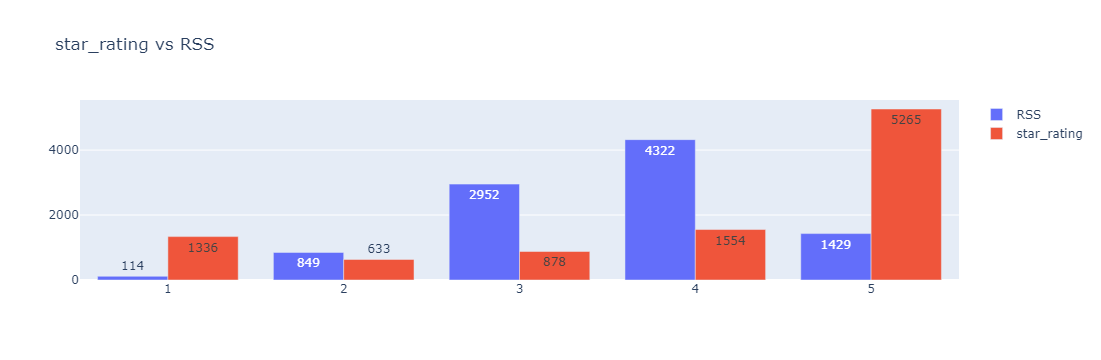

In [79]:
overall_counts = dataset['overall'].value_counts()
RSS_counts = dataset['RSS'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(x=RSS_counts.index, y=RSS_counts.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=RSS_counts.values,
                name='RSS',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))
fig.add_trace(go.Bar(x=overall_counts.index, y=overall_counts.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=overall_counts.values,
                name='star_rating',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))


fig.update_layout(
    title = 'star_rating vs RSS'
)
fig.show()

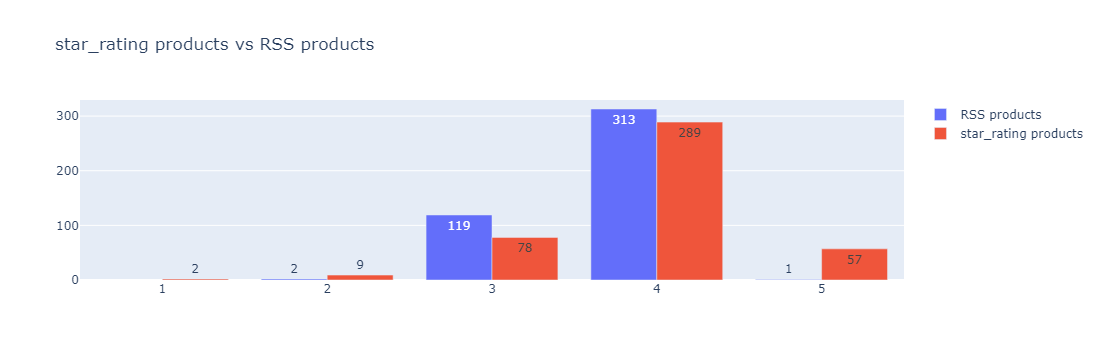

In [80]:
rss_products = scores_df['RSS'].round().value_counts()
star_products = scores_df['star_rating'].round().value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(x=rss_products.index, y=rss_products.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=rss_products.values,
                name='RSS products',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))

fig.add_trace(go.Bar(x=star_products.index, y=star_products.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=star_products.values,
                name='star_rating products',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))

fig.update_layout(
    title = 'star_rating products vs RSS products'
)
fig.show()

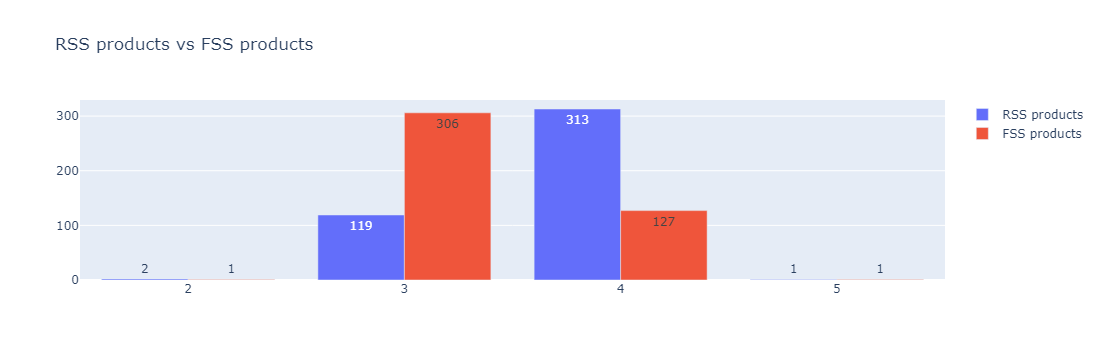

In [81]:
fss_products = scores_df['FSS'].round().value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(x=rss_products.index, y=rss_products.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=rss_products.values,
                name='RSS products',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))

fig.add_trace(go.Bar(x=fss_products.index, y=fss_products.values,
                #base=[-500,-600,-700],
                #marker_color='green',
                text=fss_products.values,
                name='FSS products',
                #texttemplate='%{text:.2f}',
                textposition='auto',
                ))

fig.update_layout(
    title = 'RSS products vs FSS products'
)
fig.show()

In [82]:
def create_circular_mask(diameter):
    x, y = np.ogrid[:diameter, :diameter]
    center = (diameter - 1) / 2
    mask = (x - center) ** 2 + (y - center) ** 2 > center ** 2
    return 255 * mask.astype(int)

# Dimensione della maschera
diameter = 400

# Creazione della maschera circolare
circular_mask = create_circular_mask(diameter)

## DASHBOARDS

In [83]:
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud

def plot_features_wc(asin):
    for product in features_scores:
        if(product['asin'] == asin):
            pos_features = {k: v for k, v in product['features'].items() if v > 3}
            neg_features = {k: v for k, v in product['features'].items() if v < 3}

    # Definizione della palette di colori personalizzata
    colors = ["#FF5733", "#33FF57", "#3357FF"]
    cmap = LinearSegmentedColormap.from_list("custom_palette", colors)
    
    # Generate the word cloud
    pos_wordcloud = WordCloud(mask=circular_mask, relative_scaling=0,width=600, height=400, colormap=cmap, background_color='white').generate_from_frequencies(frequencies=pos_features)
    neg_wordcloud = WordCloud(mask=circular_mask, relative_scaling=0,width=600, height=400,colormap=cmap, background_color='white').generate_from_frequencies(frequencies=neg_features)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(pos_wordcloud, interpolation='bilinear')
    axs[0].axis('off')  # Nascondi gli assi
    axs[0].set_title('positive features')

    axs[1].imshow(neg_wordcloud, interpolation='bilinear')
    axs[1].axis('off')  # Nascondi gli assi
    axs[1].set_title('negative features')
    
    plt.tight_layout()
    plt.show()

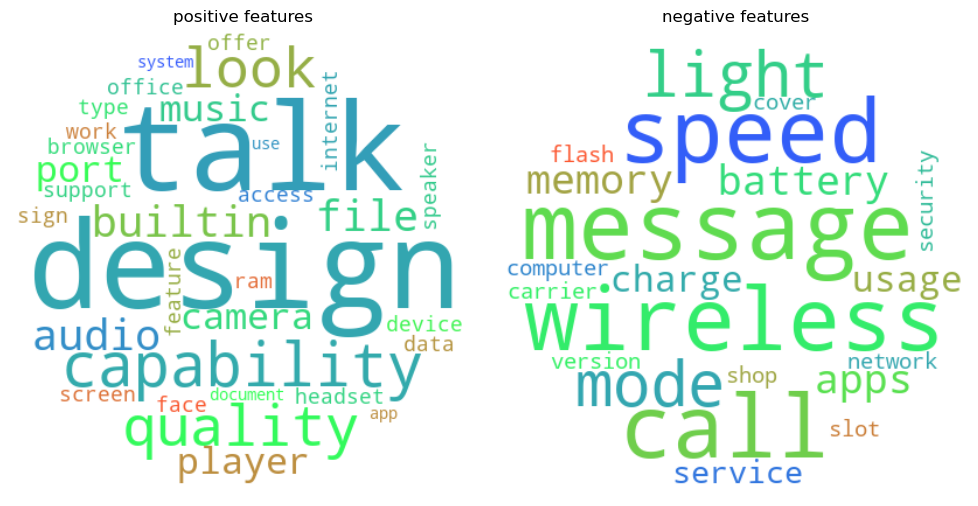

In [84]:
plot_features_wc(features_scores[0]['asin'])

In [85]:
def top_k_products_by_feature(feature, k):
    p = [(product['asin'],product['features'][feature]) for product in features_scores if feature in product['features'].keys()]
    top_K = sorted(p, key=lambda x: x[1], reverse=True)[:k]
    return top_K

In [86]:
top_k_products_by_feature('charger',25)

[('B005KMCLIW', 5.0),
 ('B005Z32UI2', 5.0),
 ('B00X4G7O06', 5.0),
 ('B0147LDSG0', 5.0),
 ('B016V8MYYO', 5.0),
 ('B001OD2OAQ', 4.0),
 ('B003YHOXFY', 4.0),
 ('B004VRJ036', 4.0),
 ('B00578HQAW', 4.0),
 ('B009ZC91AY', 4.0),
 ('B00BV1MVJ0', 4.0),
 ('B00D8T9QZU', 4.0),
 ('B00E1TF21I', 4.0),
 ('B00EW1MUII', 4.0),
 ('B00GWR373M', 4.0),
 ('B00HAMRFQS', 4.0),
 ('B00JFLS8B8', 4.0),
 ('B00RKN0IAC', 4.0),
 ('B00YA8308M', 4.0),
 ('B00ZVNQAA0', 4.0),
 ('B01CNPTKLE', 4.0),
 ('B01DC453ES', 4.0),
 ('B01E5TOIKO', 4.0),
 ('B01E5UCWYW', 4.0),
 ('B00ECBVNWC', 3.75)]

In [87]:
def top_k_features(product_asin,k): 
    features = [product['features'] for product in features_scores if product['asin']==product_asin][0]
    return {k:v for k, v in sorted(features.items(), key=lambda item: item[1], reverse=True)[:5]}
    #top_K = sorted(features, key=lambda x: x[1], reverse=True)[:k]
    #return features

In [88]:
top_k_features(features_scores[0]['asin'],5)

{'design': 4.5, 'talk': 4.0, 'capability': 4.0, 'quality': 4.0, 'look': 4.0}

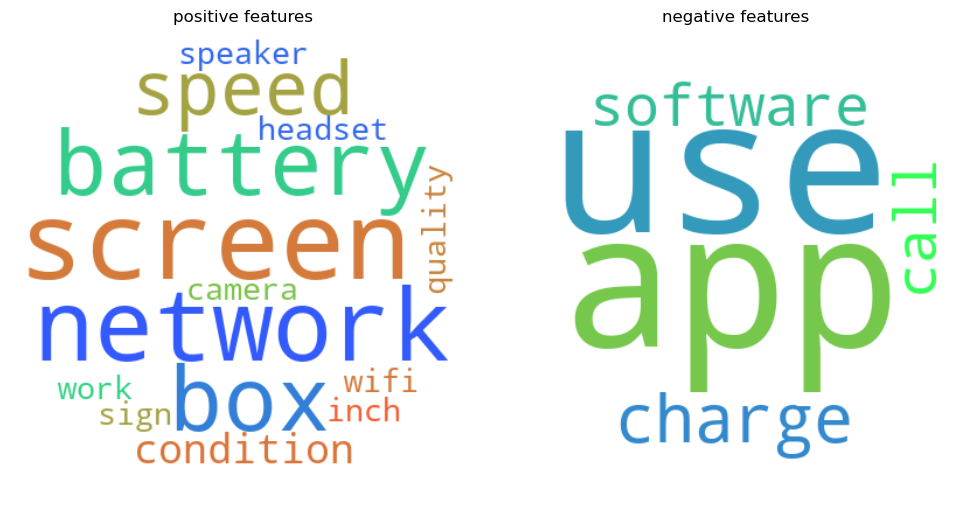

In [107]:
plot_features_wc(desc_scores.loc[434,'asin'])

In [98]:
desc_scores

,asin,RSS,star_rating,price,FSS,global_score
0,B00NWRD6MC,4.666667,5.000000,49.98,4.375000,0.939231
1,B01EVMZMZU,4.500000,5.000000,59.16,4.444444,0.924919
2,B008LR0TWI,4.250000,5.000000,27.57,4.428571,0.917245
3,B006JI3RKC,4.500000,5.000000,59.00,4.166667,0.899753
4,B004Z2VEWC,4.333333,5.000000,68.11,4.222222,0.884217
...,...,...,...,...,...,...
430,B00NLYMXK2,3.700000,4.100000,500.00,3.363636,0.466546
431,B01AYCLXJA,3.333333,1.333333,74.98,2.555556,0.451876
432,B017E971OC,3.125000,3.250000,367.99,3.220526,0.429033
433,B00TX5PYT0,3.000000,1.000000,128.62,3.100000,0.424238


In [104]:
[p for p in features_scores if p['asin']=='B00NWRD6MC']

[{'asin': 'B00NWRD6MC',
  'preprocessed_sentences': {'good far': 5,
   'picture excellent': 5,
   'this one best phone market good screen great sound good battery life sleek design buy love balanced phone': 4,
   'wonderfull love model': 5},
  'features': {'screen': 4.0,
   'battery': 4.0,
   'design': 4.0,
   'picture': 5.0,
   'mode': 5.0,
   'sound': 4.0,
   'sign': 4.0,
   'model': 5.0}}]

In [108]:
scores_df[(scores_df['star_rating'] - scores_df['RSS'] > 2)]

,asin,RSS,star_rating,price,FSS,global_score
101,B00846GUOM,2.0,5.0,26.76,2.0,0.485969


In [110]:
[p for p in features_scores if p['asin']=='B00846GUOM']

[{'asin': 'B00846GUOM',
  'preprocessed_sentences': {'excelente': 3,
   'lo traje venezuela funciona calidad e un poco parecido al 9360 este e ma sencillo claramente sin embargo con el sistema bb7 correo muy bien': 2,
   'lo recomiendo': 3},
  'features': {'ram': 2.0}}]